# Import Libraries

In [56]:
import numpy as np
import math
import matplotlib.pyplot as plt

from lib.utils import batch_load, load_image
from lib import normalize_image, mean_image, calculate_covariance, qr_algorithm, sort_image_by_eigenvalue, build_eigenfaces, calculate_weight

# Load Images

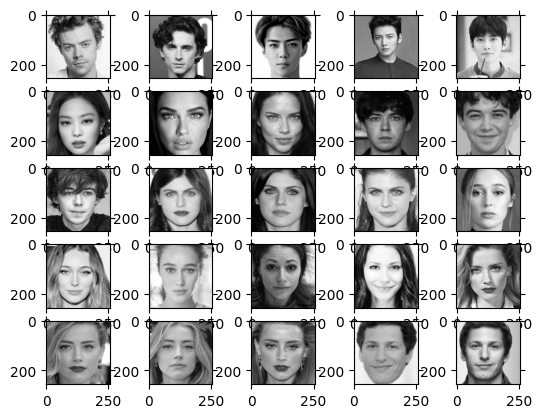

In [57]:
MAX_LOADED_IMAGE = 500

images, path = batch_load("../test/Dataset", MAX_LOADED_IMAGE)

for i in range (25):
    plt.subplot(5,5,1+i)
    plt.imshow(images[i].reshape(256,256), cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# Mean Face

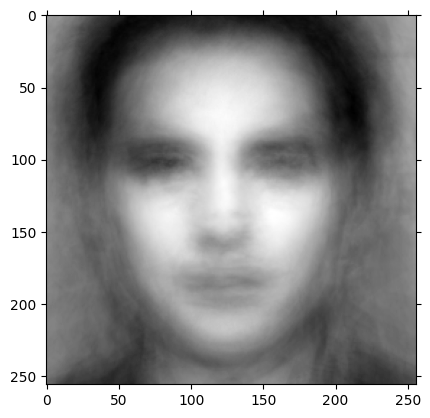

In [58]:
mean = mean_image(images)
plt.imshow(mean.reshape(256,256), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()


# Normalized Images

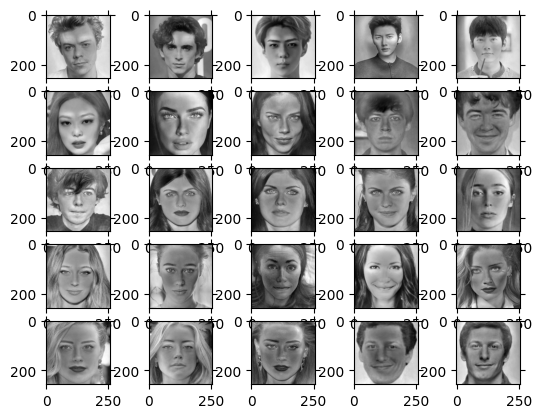

In [59]:
normalized_images = normalize_image(images)

for i in range (25):
    plt.subplot(5,5,1+i)
    plt.imshow(normalized_images[i].reshape(256,256), cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()


# Display Eigenfaces

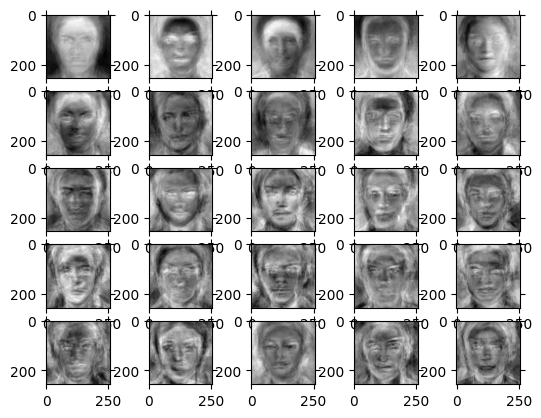

In [60]:
covariance = calculate_covariance(normalized_images)

eigenvalue, eigenvector = qr_algorithm(covariance)

eigenvalue_sorted, eigenvector_sorted, normalized_images_sorted, path_sorted = sort_image_by_eigenvalue(
    eigenvalue, eigenvector, normalized_images, path)

eigenfaces = build_eigenfaces(
    eigenvalue_sorted, eigenvector_sorted, normalized_images_sorted)

for i in range (25):
    plt.subplot(5,5,1+i)
    plt.imshow(eigenfaces[i].reshape(256,256), cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# Display Result

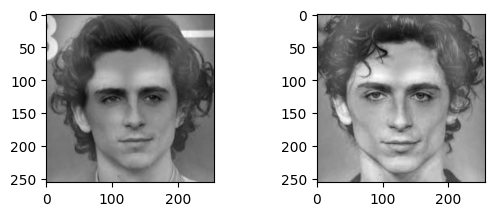

Matched 100.0%


In [61]:
processed_image = calculate_weight(
    eigenfaces, normalized_images_sorted, path_sorted)

# bagian test
test_image = load_image("../test/Test/download (1).jpg")

normalized_test = test_image - mean

weight = []

for eigenface in eigenfaces:
    combination = eigenface.T @ normalized_test
    weight.append(combination)

result = []

for image in processed_image:
    distance = np.sqrt(np.power(np.array(image["weight"] - weight), 2).sum())
    result.append(distance)

divisor =math.sqrt(np.power(np.array(result), 2).sum())
    # normalize result
result = [1-(a/divisor) for a in result]
ret = max(result)

if ret>=0.5:
    idx = result.index(ret)
    matched_image = processed_image[idx]
    closest_image_path = matched_image['path']
    plt.subplot(2, 2, 1)
    plt.imshow(normalized_test.reshape((256, 256)), cmap='gray')
    plt.subplot(2, 2, 2)
    plt.imshow(matched_image["normalized_image"].reshape((256, 256)), cmap='gray')
    plt.show()
    print("Matched "+str(round(ret*100, 2))+"%")
else:
    print("No match!")
# minweight = min(result)

# idx = result.index(minweight)

# matched_image = processed_image[idx]

# print(f"Got path: {matched_image['path']}")

